# The Fashion MNIST problem with Keras
In this notebook you will solve a binary variant of the Fashion MNIST problem. The original Fashion MNIST dataset contains images for 10 different classes of clothing. We have selected two classes from this dataset for you to work on.

You will preprocess the data to get it into the right shape to process with Keras, and see how overfitting and underfitting shows itself in the loss and accuracy curves during training.

Let's load Keras and some helper functions first:

In [1]:
library(keras)
source("02-helpers.R")

Let's load the data set:

In [2]:
data <- dataset_fashion_mnist_binary()
data_train <- data$train
data_test <- data$test

## Exercise 1
Inspect the dimensions of the training and test data. What do the different dimensions represent for the `x` and `y` variables inside each set?

**Hint**: first inspect the contents of data_train and data_test using the [`names`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/names) function. This function will show you the names of the variables inside of an R object.

In [ ]:
<FILL IN>

In [5]:
dim(data_train$x)
length(data_train$y)

[1] 12000    28    28

[1] 12000

In [6]:
dim(data_test$x)
length(data_test$y)

[1] 2000   28   28

[1] 12000

Let's plot one of the samples in the training set:

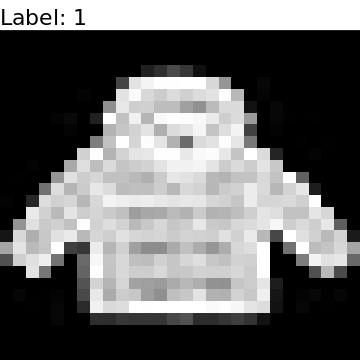

In [10]:
library(ggplot2)
library(reshape2)

index <- 6000
options(repr.plot.width = 3, repr.plot.height = 3)
ggplot(melt(t(apply(data_train$x[index,,], 2, rev)), varnames=c('x', 'y')), aes(x=x, y=y, fill=value)) +
    geom_raster() +
    scale_x_continuous(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    scale_fill_gradient(low="#000000", high="#FFFFFF") +
    theme_void() +
    theme(legend.position = "none") +
    ggtitle(paste('Label:', data_train$y[index]))
options(repr.plot.width = 6, repr.plot.height = 5)

## Exercise 2
The input images have pixel values that are not in the range 0 to 1. Rescale them such that all values are in this range.

**Hint**: use R's `min` and `max` functions to find out the minimum and maximum.

In [ ]:
<FILL IN>

In [ ]:
data_train$x <- data_train$x / 255

## Exercise 3
Divide the original training data 80%-20% between the new training and validation set. Make sure that you slice both the images and the labels, and verify the dimensions of the two sets using `dim` and `length`.

**Hints**:
1. You will need four variables for storing the images and labels of your two sets.
1. Think carefully about the dimensions of the data, and how it affects the slicing.
1. **If you are unable to solve this exercise, please continue with the next one, where we have done it for you.**

In [ ]:
<FILL IN>

In [ ]:
index <- 0.8 * length(data_train$y)
dim(data_train$y)
x_val <- data_train$x[-(1:index),,]
y_val <- data_train$y[-(1:index)]

dim(x_val)
dim(y_val)

x_train <- data_train$x[1:index,,]
y_train <- data_train$y[1:index]

dim(x_train)
dim(y_train)

## Run the cell below only if you did not complete exercise 3
If you couldn't slice the training and validation set yourself, please run the following code to make sure you have the preprocessed data ready. If not, please continue to the next cell.

In [4]:
data <- dataset_fashion_mnist_binary()
data_train <- data$train
data_test <- data$test

data_train$x <- data_train$x / 255  # Normalise the image values between 0 and 1

# Slice the data

index <- 0.8 * length(data_train$y)
dim(data_train$y)
x_val <- data_train$x[-(1:index),,]
y_val <- data_train$y[-(1:index)]

dim(x_val)
dim(y_val)

x_train <- data_train$x[1:index,,]
y_train <- data_train$y[1:index]

dim(x_train)
dim(y_train)

[1] 12000

[1] 2400   28   28

[1] 2400

[1] 9600   28   28

[1] 9600

## Exercise 4
Create an initial model by filling out the skeleton below. We have provided you with the first two layers. The first layer is a **flatten** layer, which will convert the two-dimensional 28 x 28 image into a one-dimensional vector of length 784.

Print a summary of the model and verify the output shapes of each layer.

In [ ]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    <FILL IN>

In [7]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 512, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

weights <- get_weights(model)  # We will use the initial weights later

model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_1 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 512)                     401920      
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       513         
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
________________________________________________________________________________



## Exercise 5
Compile the model by filling out the skeleton below according to the following requirements:
1. The optimizer should be `optimizer_adam` with learning rate 0.001
1. The loss should be `binary_crossentropy`
1. The metric should be accuracy (warning: Keras expects a character vector)

**Hint**: it may help to keep the previous notebook open for reference.

In [ ]:
model %>% compile(
    optimizer = <FILL IN>,
    loss = <FILL IN>,
    metrics = <FILL IN>
)

In [8]:
model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

## Exercise 6
Fit the model and plot the training history by filling out the skeleton below. Try to get the accuracy close to or equal to 1.

**Hint**: adapt the learning rate and number of epochs to increase performance.

In [ ]:
model %>% set_weights(weights)  # this will make sure we reset the model to its initial weights
history <- model %>% fit(
    x = <FILL IN>,
    y = <FILL IN>,
    epochs = <FILL IN>,
    batch_size = 1024,
    callbacks=list(Progress$new())
)
plot(history)

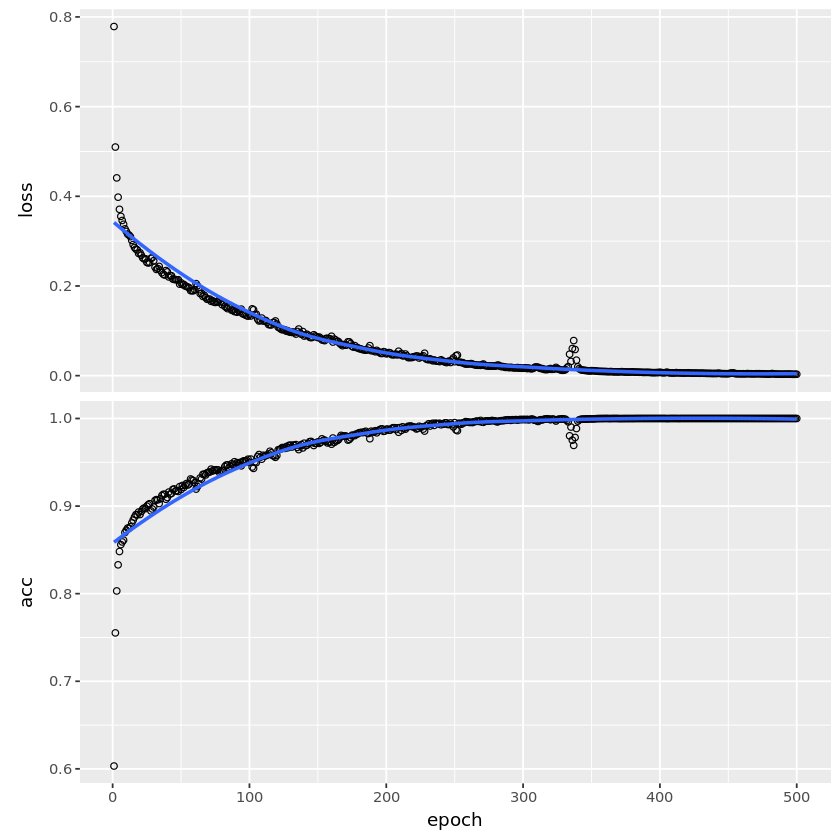

In [9]:
model %>% set_weights(weights)  # this will make sure we reset the model to its initial weights
history <- model %>% fit(
    x = x_train,
    y = y_train,
    epochs = 500,
    batch_size = 1024,
    callbacks=list(Progress$new())
)
plot(history)

## Exercise 7
You have fit your model (almost) perfectly on the training set. In the skeleton below, add the validation data to the training process and inspect the resulting loss and accuracy on the validation set. At what point does the model start overfitting? 

In [ ]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    <FILL IN>

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(<FILL IN THE VALIDATION IMAGES, FILL IN THE VALIDATION LABELS>),
    epochs = 500,
    batch_size = 1024,
    callbacks=list(Progress$new())
)
plot(history)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_1 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 512)                     401920      
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       513         
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
________________________________________________________________________________


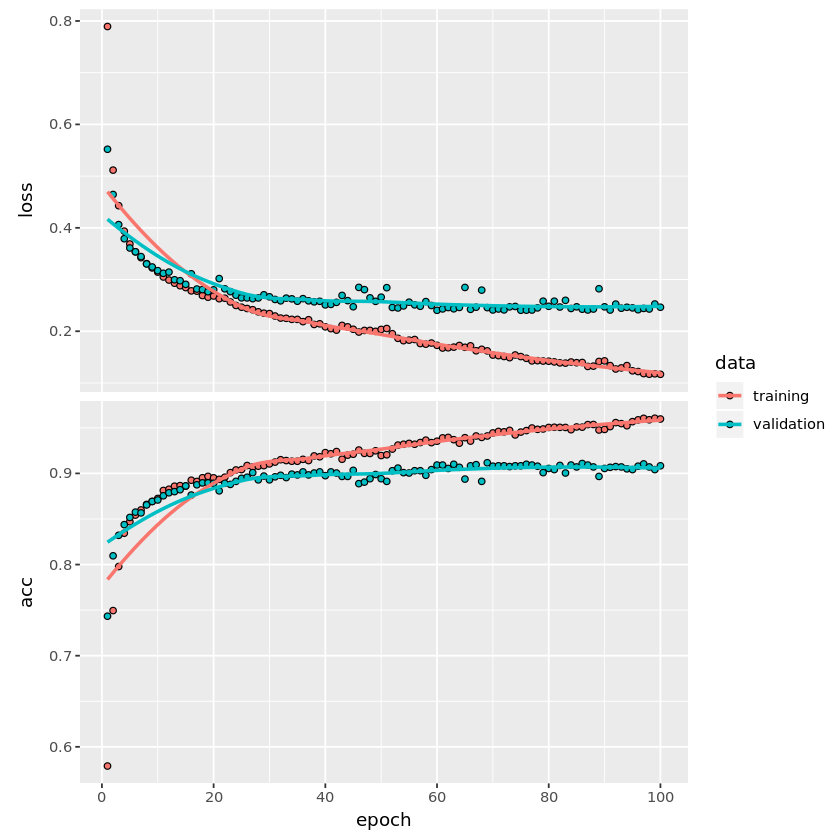

In [5]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 512, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 100,
    batch_size = 1024,
    callbacks=list(Progress$new())
)
plot(history)

In [ ]:
# Given this particular model, overfitting starts to occur around epoch 17. At that point the loss of the validation
# set starts to exceed the loss on the training set

Let's **evaluate** our model on the test set to obtain a final estimate of our model's performance. We need to rescale the test set's images based on the range from our training images. It was 0 to 255, as you may remember.

After rescaling, we evaluate using the [`evaluate`](https://tensorflow.rstudio.com/keras/reference/evaluate.html) function:

In [6]:
x_test <- data_test$x
y_test <- data_test$y
model %>% evaluate(x_test, y_test)

$loss
[1] 1.896049

$acc
[1] 0.881

As you can see, the test set accuracy is comparable to the validation set accuracy. Although we could use the validation accuracy as a measure of how well we do on unseen the data, we still optimise our model on the validation set by adapting the hyperparameters ourselves. In this sense, the validation set is not truly unseen: we need to rely on the test set to give us a final verdict on the model's performance.

## Exercise 8: bonus
Reduce the capacity of the model such that you do not overfit. How many layers and neurons do you have?

In [ ]:
<FILL IN>

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_7 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_13 (Dense)                    (None, 2)                       1570        
________________________________________________________________________________
dense_14 (Dense)                    (None, 1)                       3           
Total params: 1,573
Trainable params: 1,573
Non-trainable params: 0
________________________________________________________________________________


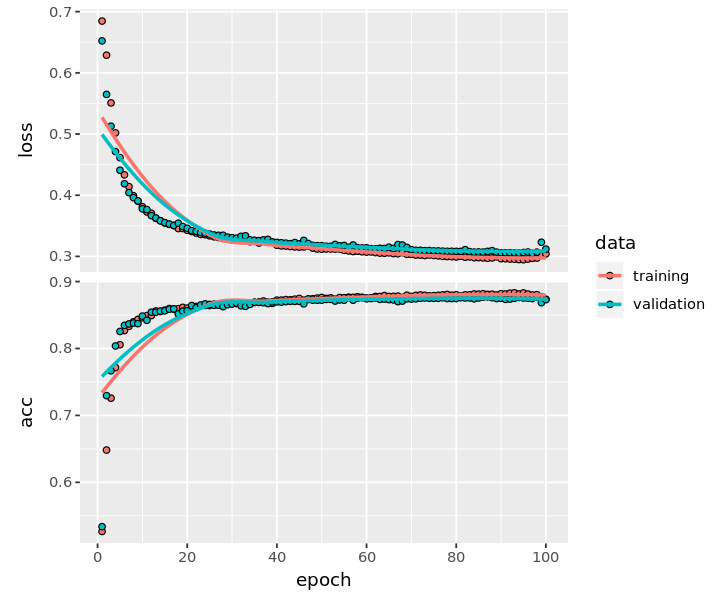

In [17]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 2, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 100,
    batch_size = 1024,
    callbacks=list(Progress$new())
)
plot(history)

In [22]:
# With a hidden layer of two neurons we do not overfit as strongly, although we still overfit.
# This data set is not very hard, and even with two neurons we can get a very good accuracy. This also shows you
# that overfitting can happen even with very low-capacity models.

## Exercise 9: bonus
Decrease the batch size by factors of four, and inspect the resulting loss curves. What happens when you approach a batch size of 1? How do you explain this behaviour?

In [ ]:
<FILL IN>

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_11 (Flatten)                (None, 784)                     0           
________________________________________________________________________________
dense_21 (Dense)                    (None, 2)                       1570        
________________________________________________________________________________
dense_22 (Dense)                    (None, 1)                       3           
Total params: 1,573
Trainable params: 1,573
Non-trainable params: 0
________________________________________________________________________________


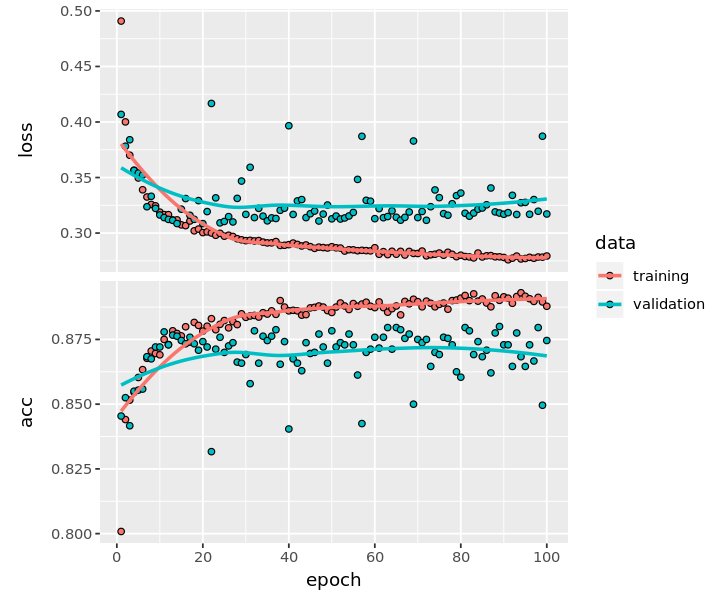

In [21]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 2, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 100,
    batch_size = 4,
    callbacks=list(Progress$new())
)
plot(history)

In [ ]:
# As the batch size approaches one, we estimate the gradient using fewer and fewer samples. As a result, it will be 
# less accurate and more noisy. This may actually help the model to escape problematic areas of the loss surface 
# (local minima), but will give a noisier loss curve. Every epoch we have many imprecise weight updates, which have 
# a large effect on the loss.